In [ ]:
!pip install fredapi > /dev/null

In [ ]:
!pip3 install gsheet-keyring > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred
from google.colab import userdata
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Import the API key from secrets

In [ ]:
fred_api_key = userdata.get('fred_api_key')

# Creating the Fred Object

In [ ]:
fred = Fred(api_key=fred_api_key)
fred

In [ ]:
snp_df = fred.search('S&P',order_by='popularity',limit=5000)

In [ ]:
snp_df.shape

(5000, 15)

In [ ]:
snp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-16,2024-02-16,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-16 08:29:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-16,2024-02-16,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-01-30 08:11:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-02-16,2024-02-16,S&P 500,2014-02-18,2024-02-15,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-15 19:10:59-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-16,2024-02-16,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-16,2024-02-16,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-16 08:28:05-06:00,82,This data represents the effective yield of th...


In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500

2014-02-17        NaN
2014-02-18    1840.76
2014-02-19    1828.75
2014-02-20    1839.78
2014-02-21    1836.25
               ...   
2024-02-09    5026.61
2024-02-12    5021.84
2024-02-13    4953.17
2024-02-14    5000.62
2024-02-15    5029.73
Length: 2609, dtype: float64

In [ ]:
# Convert the index to datetime
sp500.index = pd.to_datetime(sp500.index)

# Plot the data using Plotly Express
fig = px.line(sp500, x=sp500.index, y=sp500.values, title='S&P 500 Index')
fig.show()


In [ ]:
unemp_results = fred.search('unemployment',limit=5000)
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-02-16,2024-02-16,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-02-16,2024-02-16,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-02 07:49:06-06:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2024-02-16,2024-02-16,Continued Claims (Insured Unemployment),1967-01-07,2024-02-03,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-02-15 07:33:05-06:00,74,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2024-02-16,2024-02-16,Unemployment Level,1948-01-01,2024-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-02-02 07:49:03-06:00,69,The series comes from the 'Current Population ...
NROU,NROU,2024-02-16,2024-02-16,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,66,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOCPURN,MOCPURN,2024-02-16,2024-02-16,"Unemployment Rate in Cape Girardeau County, MO",1990-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-06 10:13:11-06:00,2,These data come from the Current Population Su...
INDUURN,INDUURN,2024-02-16,2024-02-16,"Unemployment Rate in Dubois County, IN",1990-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-06 10:29:05-06:00,2,These data come from the Current Population Su...
OKALFA3URN,OKALFA3URN,2024-02-16,2024-02-16,"Unemployment Rate in Alfalfa County, OK",1990-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-06 10:14:48-06:00,2,These data come from the Current Population Su...


In [ ]:
unemp_rate = fred.get_series(series_id='UNRATE')
# Convert the index to datetime
unemp_rate.index = pd.to_datetime(unemp_rate.index)

# Plot the data using Plotly Express
fig = px.line(unemp_rate, x=unemp_rate.index, y=unemp_rate.values, title='Unemployment Rate')
fig.show()


In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [ ]:
cols_to_drop=[]
for col in uemp_results:
  if len(col)>4:
    cols_to_drop.append(col)
uemp_results=uemp_results.drop(cols_to_drop,axis=1)

<Axes: >

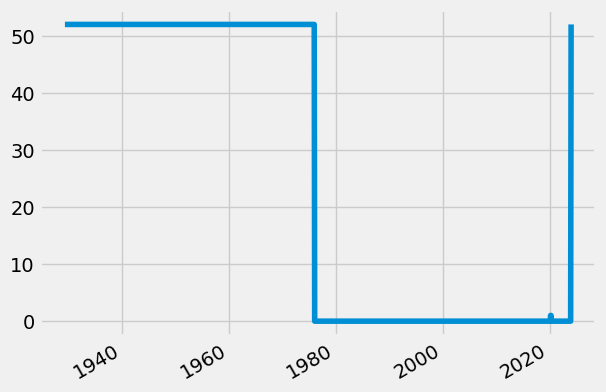

In [ ]:
uemp_results.isna().sum(axis=1).plot()

In [ ]:
uemp_results=uemp_results.dropna()
id_to_state=unemp_df['title'].str.replace("Unemployment Rate in","").to_dict()
uemp_results.columns=[id_to_state[c] for c in uemp_results]

In [ ]:
# Plot the data using Plotly Express
fig = px.line(uemp_results,title='Unemployment Rate per State')
# Set x-axis label
fig.update_xaxes(title_text='Time')
# Set y-axis label
fig.update_xaxes(title_text='Unemployment Rate')
# Add interactive legend
# fig.update_layout(legend=dict(title='State', orientation='v', yanchor="bottom", y=1.02, xanchor="right", x=1))

# Show the plot
fig.show()


# Pull April 2020 Unemployment rate per state

In [ ]:


# Filter data for May 2020
uemp_results_may_2020 = uemp_results.loc[uemp_results.index == '2020-05-01']

# Transpose the DataFrame
uemp_results_may_2020_transposed = uemp_results_may_2020.T

# Sort values by unemployment rate for May 2020
uemp_results_may_2020_sorted = uemp_results_may_2020_transposed.sort_values(by='2020-05-01', ascending=True)

# Create the bar plot using Plotly Express
fig = px.bar(uemp_results_may_2020_sorted, x='2020-05-01', y=uemp_results_may_2020_sorted.index,
             orientation='h', title='Unemployment Rate by State, May 2020',
             labels={'2020-05-01': 'Unemployment Rate'})

# Update layout properties
fig.update_layout(yaxis_title='State', xaxis_title='Unemployment Rate')

# Show the plot
fig.show()

# Partitipation Rate

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_df = part_df[part_df.index.map(len) <= 7]

In [ ]:
part_df['title']

series id
CIVPART                       Labor Force Participation Rate
LBSSA06        Labor Force Participation Rate for California
LBSSA01           Labor Force Participation Rate for Alabama
LBSSA21          Labor Force Participation Rate for Kentucky
LBSSA26          Labor Force Participation Rate for Michigan
LBSSA36          Labor Force Participation Rate for New York
LBSSA12           Labor Force Participation Rate for Florida
LBSSA48             Labor Force Participation Rate for Texas
LBSSA27         Labor Force Participation Rate for Minnesota
LBSSA28       Labor Force Participation Rate for Mississippi
LBSSA39              Labor Force Participation Rate for Ohio
LBSSA13           Labor Force Participation Rate for Georgia
LBSSA54     Labor Force Participation Rate for West Virginia
LBSSA55         Labor Force Participation Rate for Wisconsin
LBSSA42      Labor Force Participation Rate for Pennsylvania
LBSSA22         Labor Force Participation Rate for Louisiana
LBSSA24       

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
uemp_results.columns=[c.strip() for c in uemp_results.columns]
uemp_results.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Ohio', 'Michigan',
       'Pennsylvania', 'North Carolina', 'Illinois', 'Alabama',
       'Massachusetts', 'New Jersey', 'Colorado', 'Georgia', 'Arizona',
       'Minnesota', 'Wisconsin', 'Virginia', 'Kentucky', 'Tennessee',
       'Washington', 'Oregon', 'South Carolina', 'Iowa', 'Louisiana',
       'Maryland', 'New Mexico', 'Arkansas', 'Indiana', 'Nevada', 'Missouri',
       'Oklahoma', 'Puerto Rico', 'Alaska', 'West Virginia', 'North Dakota',
       'Hawaii', 'Utah', 'Montana', 'Mississippi', 'the District of Columbia',
       'Maine', 'Connecticut', 'Kansas', 'Wyoming', 'Idaho', 'Nebraska',
       'Delaware', 'Rhode Island', 'New Hampshire', 'South Dakota', 'Vermont'],
      dtype='object')

In [ ]:
for col in part_states.columns:
  if col not in uemp_results.columns:
    del part_states[col]

In [ ]:
for col in uemp_results.columns:
  if col not in part_states.columns:
    del uemp_results[col]

# Participation vs Unemployment Rate for each state

<Axes: >

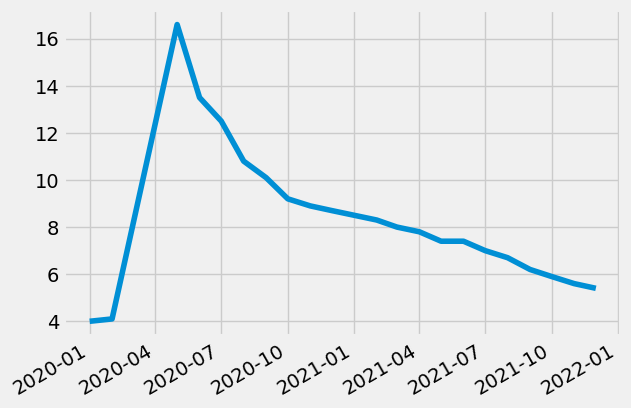

In [ ]:
uemp_results.query('index >=2020 and index<2022')['New York'].plot()

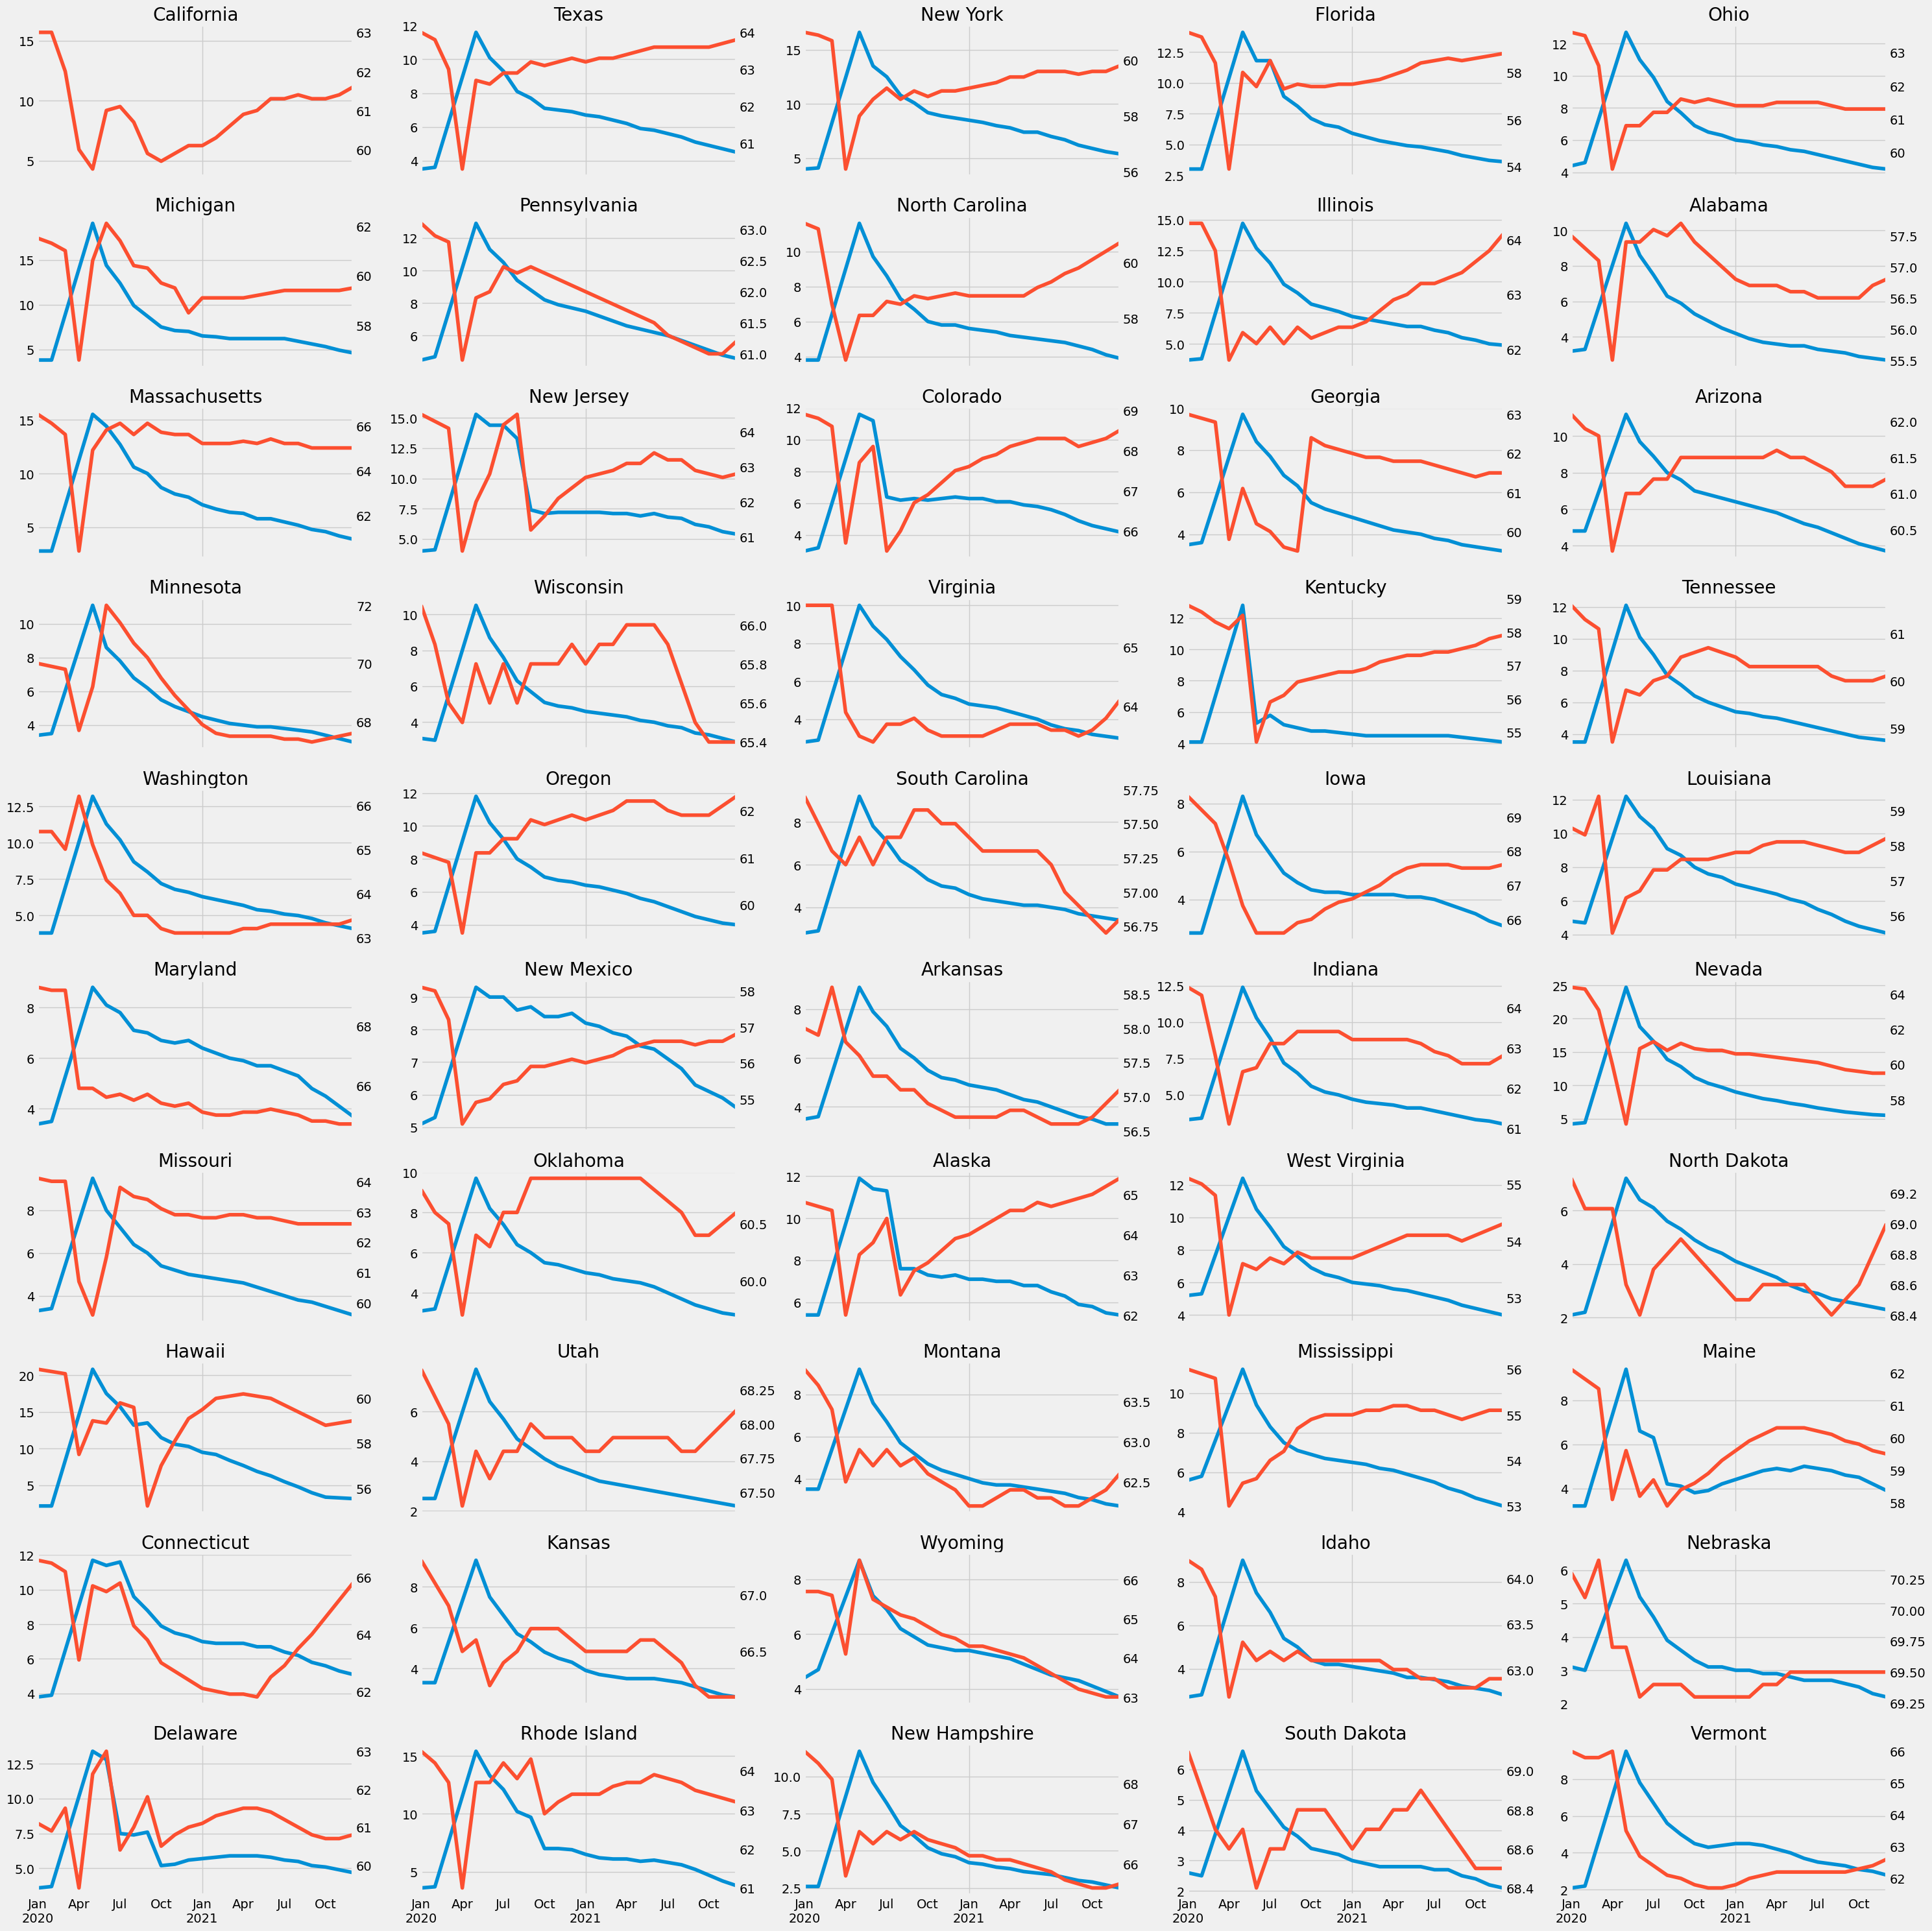

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_results.columns:
    ax2 = axs[i].twinx()
    uemp_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# Time Series Forecasting Analysis for the Unemployment Rate in the state of Washington

In [ ]:

# Extract the data for 'Washington' column
# washington_data = uemp_results[['Washington']]
washington_data = uemp_results.loc[(uemp_results.index > '2000'), ['Washington']]
# washington_data.index.freq = 'Y'
washington_data = washington_data.asfreq('MS')
washington_data.index


DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=287, freq='MS')

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

In [ ]:
fig = px.line(x = washington_data.index, y = washington_data['Washington'], labels = {'x':'Date', 'y': "Washington Unemployment Rate"})
fig.update_layout(title="Washington Unemployment Rate Over Time")
fig.show()